In [1]:
from sqlalchemy import VARCHAR,Integer,Float
import mysql.connector
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import pyodbc
import sql
from sqlalchemy import create_engine


In [2]:
engine=create_engine("mssql+pyodbc://"
    "AKSHAY\\SQLEXPRESS02/flight_data"
    "?driver=ODBC+Driver+17+for+SQL+Server"
    "&trusted_connection=yes")



In [3]:
import pyodbc 
cnxn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=AKSHAY\SQLEXPRESS02;"
                      "Database=flight_data;"
                      "Trusted_Connection=yes;")


cursor = cnxn.cursor()
cursor.execute('SELECT * FROM weather')



In [4]:
flights = pd.read_csv('E:/learn/flight delay/US_flights_2023.csv')


In [5]:
airports = pd.read_csv('E:/learn/flight delay/airports_geolocation.csv')
weather = pd.read_csv('E:/learn/flight delay/weather_meteo_by_airport.csv')
cancelled = pd.read_csv('E:/learn/flight delay/Cancelled_Diverted_2023.csv')

In [6]:
#flights.to_sql('flights', engine, if_exists='replace', index=False,chunksize=10000)


In [7]:
flights

,FlightDate,Day_Of_Week,Airline,Tail_Number,Dep_Airport,Dep_CityName,DepTime_label,Dep_Delay,Dep_Delay_Tag,Dep_Delay_Type,...,Flight_Duration,Distance_type,Delay_Carrier,Delay_Weather,Delay_NAS,Delay_Security,Delay_LastAircraft,Manufacturer,Model,Aicraft_age
0,2023-01-02,1,Endeavor Air,N605LR,BDL,"Hartford, CT",Morning,-3,0,Low <5min,...,56,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,16
1,2023-01-03,2,Endeavor Air,N605LR,BDL,"Hartford, CT",Morning,-5,0,Low <5min,...,62,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,16
2,2023-01-04,3,Endeavor Air,N331PQ,BDL,"Hartford, CT",Morning,-5,0,Low <5min,...,49,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,10
3,2023-01-05,4,Endeavor Air,N906XJ,BDL,"Hartford, CT",Morning,-6,0,Low <5min,...,54,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,17
4,2023-01-06,5,Endeavor Air,N337PQ,BDL,"Hartford, CT",Morning,-1,0,Low <5min,...,50,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6743399,2023-12-31,7,JetBlue Airways,N903JB,SJU,"San Juan, PR",Morning,4,1,Low <5min,...,219,Medium Haul <3000Mi,0,0,0,0,0,AIRBUS,A321,11
6743400,2023-12-31,7,JetBlue Airways,N535JB,MCO,"Orlando, FL",Evening,113,1,Hight >60min,...,162,Short Haul >1500Mi,4,0,0,0,96,AIRBUS,A320,22
6743401,2023-12-31,7,JetBlue Airways,N354JB,PHL,"Philadelphia, PA",Afternoon,-11,0,Low <5min,...,73,Short Haul >1500Mi,0,0,0,0,0,EMBRAER,190/195,11
6743402,2023-12-31,7,JetBlue Airways,N768JB,PBI,"West Palm Beach/Palm Beach, FL",Afternoon,-7,0,Low <5min,...,158,Short Haul >1500Mi,0,0,0,0,0,AIRBUS,A320,15


In [8]:
flights.dtypes

FlightDate            object
Day_Of_Week            int64
Airline               object
Tail_Number           object
Dep_Airport           object
Dep_CityName          object
DepTime_label         object
Dep_Delay              int64
Dep_Delay_Tag          int64
Dep_Delay_Type        object
Arr_Airport           object
Arr_CityName          object
Arr_Delay              int64
Arr_Delay_Type        object
Flight_Duration        int64
Distance_type         object
Delay_Carrier          int64
Delay_Weather          int64
Delay_NAS              int64
Delay_Security         int64
Delay_LastAircraft     int64
Manufacturer          object
Model                 object
Aicraft_age            int64
dtype: object

In [9]:
flights['FlightDate']=pd.to_datetime(flights['FlightDate'])

In [10]:
flights['Week']=flights['FlightDate'].dt.isocalendar().week
flights['Month']=flights['FlightDate'].dt.month

In [11]:
monthly_flights=flights.groupby('Month').size()
week_day_flights=flights['Day_Of_Week'].value_counts().sort_index()
weekly_flights=flights['Week'].value_counts().sort_index()

In [12]:
df=pd.DataFrame(weekly_flights)

#  Weekly and monthly flight distribution

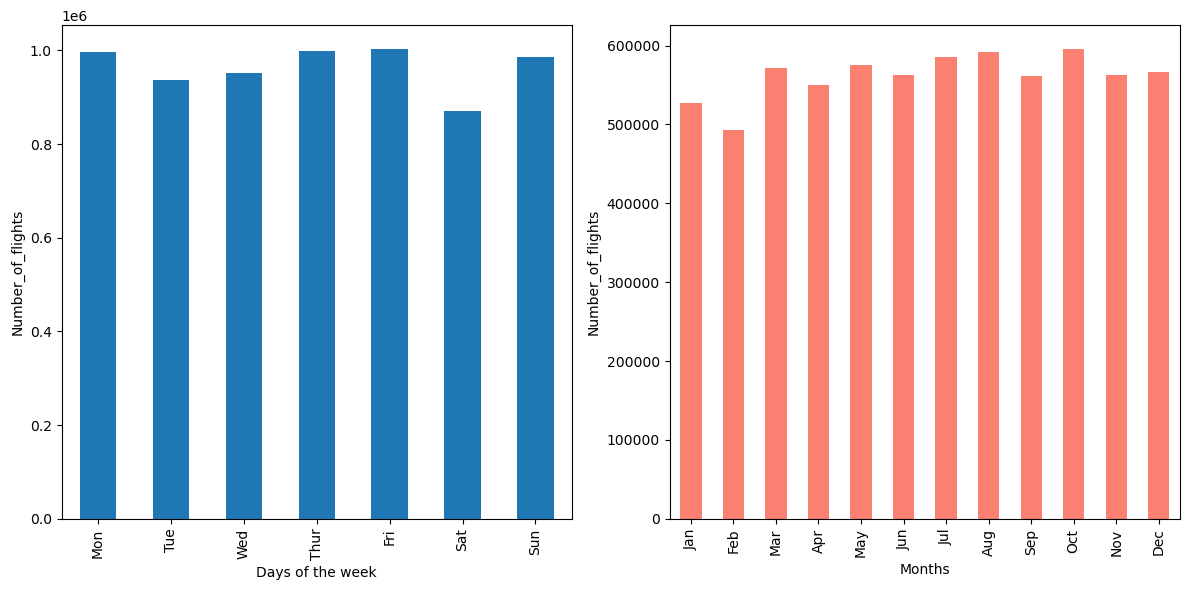

In [13]:
plt.figure(figsize=(12,6))
# Weekly Distribution of Flights
plt.subplot(1,2,1)
week_day_flights.plot(kind='bar')
plt.xlabel('Days of the week')
plt.ylabel('Number_of_flights')
plt.xticks(range(7) ,['Mon', 'Tue', 'Wed','Thur','Fri','Sat','Sun'])
plt.yticks(rotation=0)

# Monthly Flight Distribution
plt.subplot(1,2,2)
monthly_flights.plot(kind='bar',color='Salmon')
plt.xlabel('Months')
plt.ylabel('Number_of_flights')
plt.xticks(range(12) ,['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


# Weekly and  monthly flight delay

In [14]:
depart_delay=flights[flights['Dep_Delay']>0]

In [15]:
depart_delay['FlightDate']=pd.to_datetime(depart_delay['FlightDate'])

C:\Users\MSI\AppData\Local\Temp\ipykernel_19676\3438393856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depart_delay['FlightDate']=pd.to_datetime(depart_delay['FlightDate'])


In [16]:
depart_delay.loc[:,'Month']=depart_delay['FlightDate'].dt.month
depart_delay.loc[:,'Day_Of_Week']=depart_delay['FlightDate'].dt.dayofweek



In [17]:
monthly_delay_flight=depart_delay.loc[:,'Month'].value_counts().sort_index()
weekly_delay_flight=depart_delay.loc[:,'Day_Of_Week'].value_counts().sort_index()

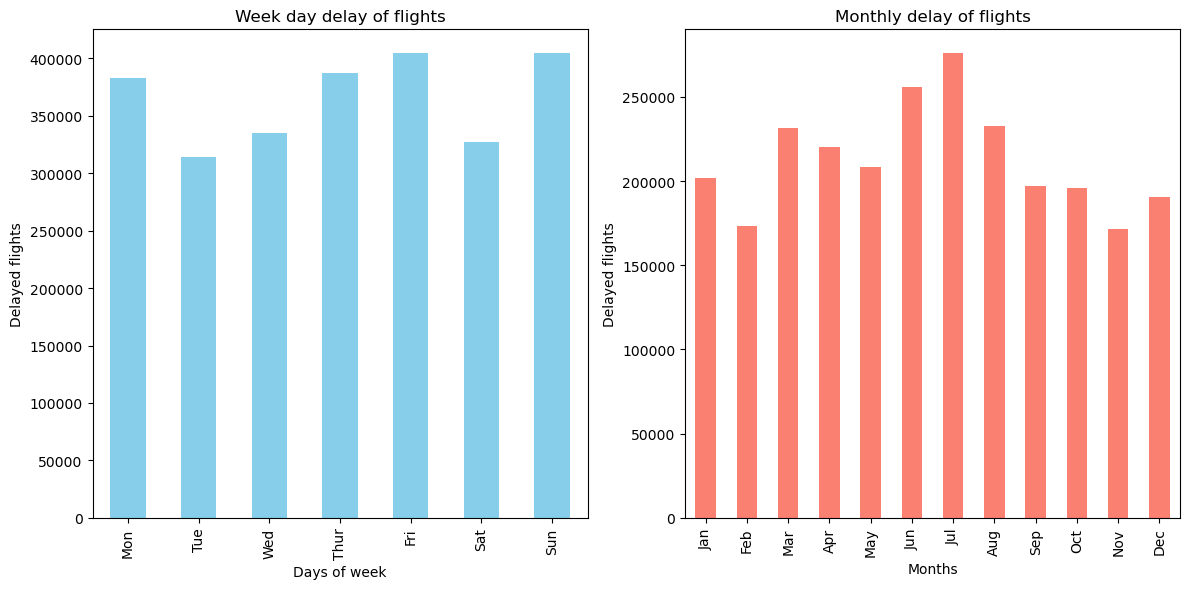

In [18]:
plt.figure(figsize=(12,6))

# Week day flights delay
plt.subplot(1,2,1)
weekly_delay_flight.plot(kind='bar',color='Skyblue')
plt.title('Week day delay of flights')
plt.xticks(range(7) ,['Mon', 'Tue', 'Wed','Thur','Fri','Sat','Sun'])
plt.xlabel('Days of week')
plt.ylabel('Delayed flights')

# Monthly Delay of flights

plt.subplot(1,2,2)
monthly_delay_flight.plot(kind='bar',color='salmon')
plt.title('Monthly delay of flights')
plt.xticks(range(12) ,['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Months')
plt.ylabel('Delayed flights')

plt.tight_layout()
plt.show()

# Weekly and monthly flight cancellation

In [19]:
cancelled

,FlightDate,Day_Of_Week,Airline,Tail_Number,Cancelled,Diverted,Dep_Airport,Dep_CityName,DepTime_label,Dep_Delay,...,Arr_CityName,Arr_Delay,Arr_Delay_Type,Flight_Duration,Distance_type,Delay_Carrier,Delay_Weather,Delay_NAS,Delay_Security,Delay_LastAircraft
0,25-01-2023,3,Endeavor Air,N691CA,1,0,JFK,"New York, NY",Evening,0,...,"Ithaca/Cortland, NY",0,No Arrival Delay,0,Short Haul,0,0,0,0,0
1,03-01-2023,2,Endeavor Air,N937XJ,1,0,MSP,"Minneapolis, MN",Morning,0,...,"Pittsburgh, PA",0,No Arrival Delay,0,Short Haul,0,0,0,0,0
2,03-01-2023,2,Endeavor Air,N937XJ,1,0,PIT,"Pittsburgh, PA",Afternoon,0,...,"Minneapolis, MN",0,No Arrival Delay,0,Short Haul,0,0,0,0,0
3,11-01-2023,3,Endeavor Air,N926XJ,1,0,BWI,"Baltimore, MD",Afternoon,0,...,"New York, NY",0,No Arrival Delay,0,Short Haul,0,0,0,0,0
4,25-01-2023,3,Endeavor Air,N335PQ,0,1,BWI,"Baltimore, MD",Afternoon,2,...,"New York, NY",0,No Arrival Delay,0,Short Haul,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104483,29-12-2023,5,JetBlue Airways,N206JB,1,0,BTV,"Burlington, VT",Morning,0,...,"New York, NY",0,No Arrival Delay,0,Short Haul,0,0,0,0,0
104484,29-12-2023,5,JetBlue Airways,N636JB,1,0,FLL,"Fort Lauderdale, FL",Evening,0,...,"Newark, NJ",0,No Arrival Delay,0,Short Haul,0,0,0,0,0
104485,29-12-2023,5,JetBlue Airways,N661JB,0,1,TPA,"Tampa, FL",Evening,122,...,"White Plains, NY",0,No Arrival Delay,0,Short Haul,0,0,0,0,0
104486,29-12-2023,5,JetBlue Airways,N216JB,1,0,DCA,"Washington, DC",Morning,0,...,"Boston, MA",0,No Arrival Delay,0,Short Haul,0,0,0,0,0


In [20]:
cancelled['FlightDate']=pd.to_datetime(cancelled['FlightDate'])

C:\Users\MSI\AppData\Local\Temp\ipykernel_19676\3603860278.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cancelled['FlightDate']=pd.to_datetime(cancelled['FlightDate'])


In [21]:
cancelled['Month']=cancelled['FlightDate'].dt.month
cancelled['Week']=cancelled['FlightDate'].dt.isocalendar().week

cancelled_flights=cancelled[cancelled['Cancelled']==1]
week_day_cancelled_flight=cancelled_flights['Day_Of_Week'].value_counts().sort_index()
monthly_cancellation=cancelled_flights['Month'].value_counts().sort_index()


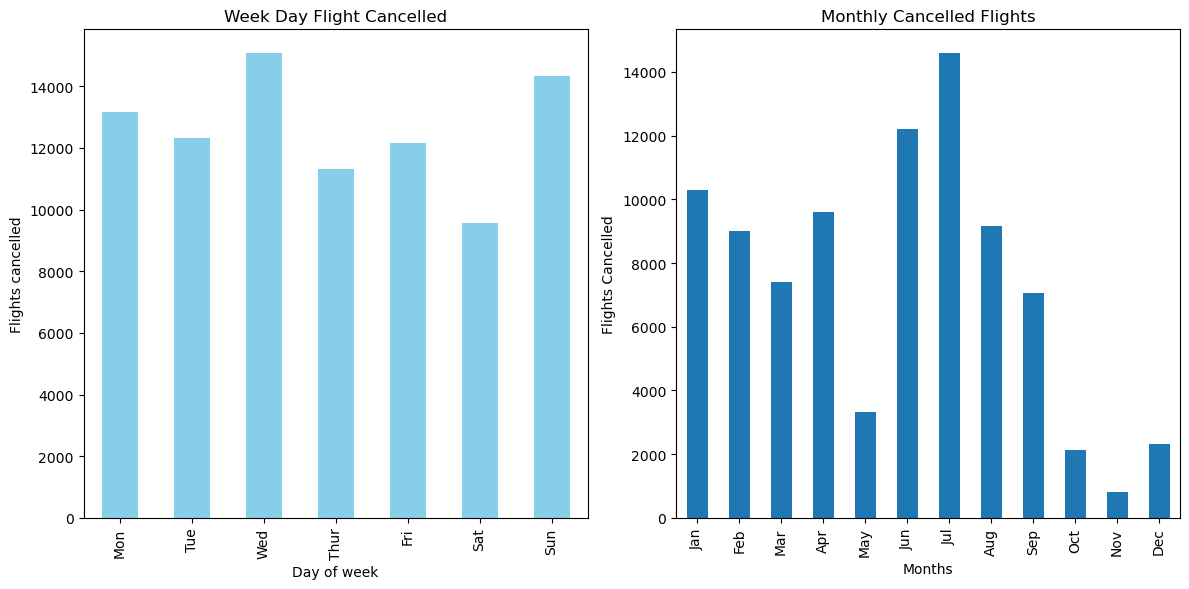

In [22]:
plt.figure(figsize=(12,6))

# Weekly Flights Cancellation
plt.subplot(1,2,1)
week_day_cancelled_flight.plot(kind='bar',color='SkyBlue')
plt.title('Week Day Flight Cancelled')
plt.ylabel('Flights cancelled')
plt.xlabel('Day of week')
plt.xticks(range(7) ,['Mon', 'Tue', 'Wed','Thur','Fri','Sat','Sun'])

# Month Wise flight cancellation
plt.subplot(1,2,2)
monthly_cancellation.plot(kind='bar')
plt.title('Monthly Cancelled Flights')
plt.xlabel('Months')
plt.ylabel('Flights Cancelled')
plt.xticks(range(12) ,['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

plt.tight_layout()
plt.show()

#  Weekly and monthly flight cancellation using sns


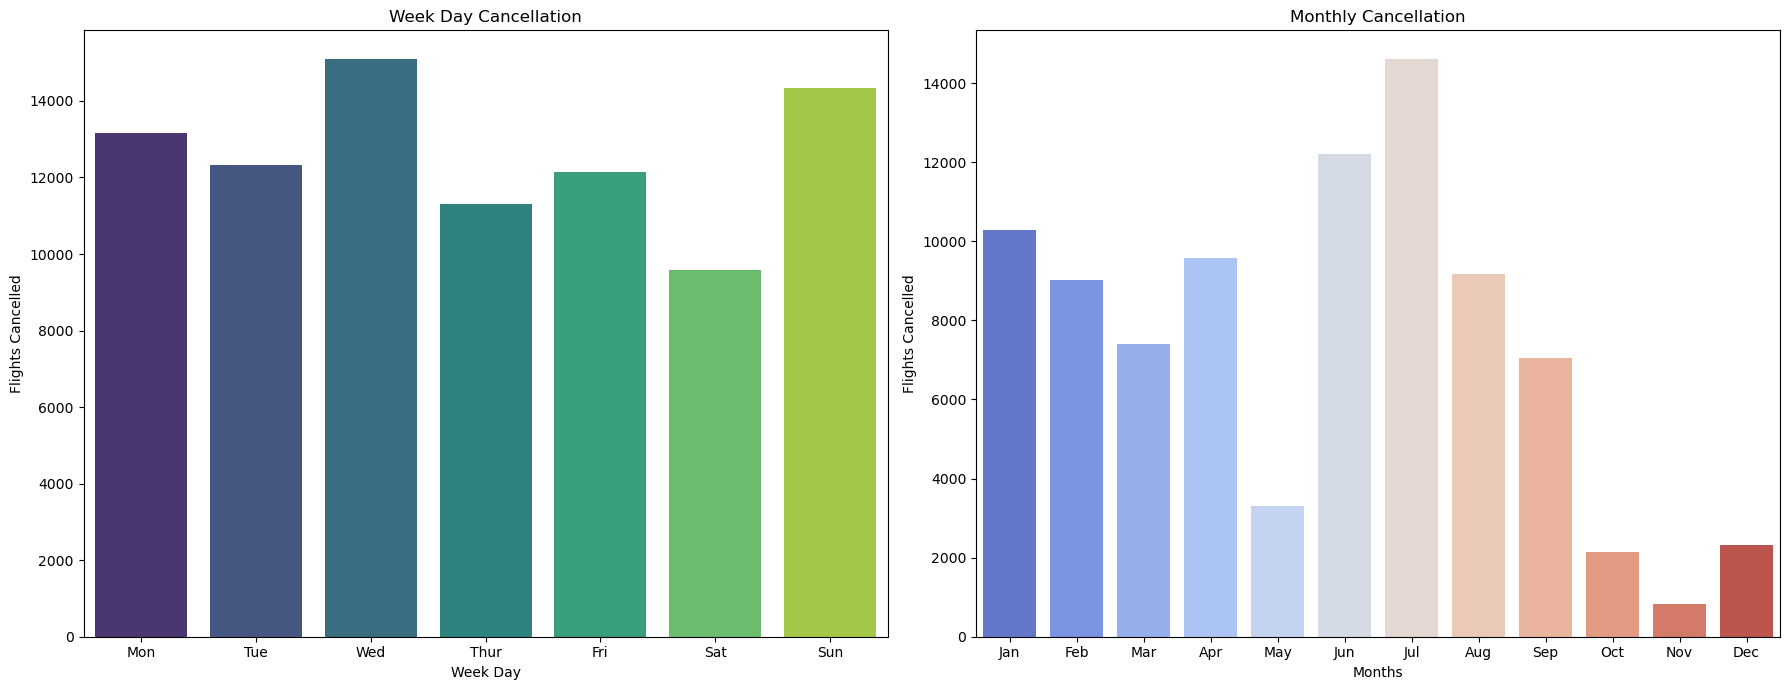

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

# Weekly Flights Cancellation

sns.barplot(x=week_day_cancelled_flight.index,y=week_day_cancelled_flight.values, ax=axes[0],palette="viridis")
axes[0].set_title('Week Day Cancellation')
axes[0].set_xlabel('Week Day')
axes[0].set_ylabel('Flights Cancelled')
axes[0].set_xticklabels(['Mon', 'Tue', 'Wed','Thur','Fri','Sat','Sun'])

# Monthly Flights Cancellation


sns.barplot(x=monthly_cancellation.index,y=monthly_cancellation.values, ax=axes[1],palette="coolwarm")
axes[1].set_title('Monthly Cancellation')
axes[1].set_xlabel('Months')
axes[1].set_ylabel('Flights Cancelled')
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])


plt.tight_layout()
plt.show()

# Weekly and Monthly flight Diversion

In [24]:
diverted_flights=cancelled[cancelled['Diverted']==1]
week_day_diverted_flight=diverted_flights['Day_Of_Week'].value_counts().sort_index()
monthly_diverted=diverted_flights['Month'].value_counts().sort_index()


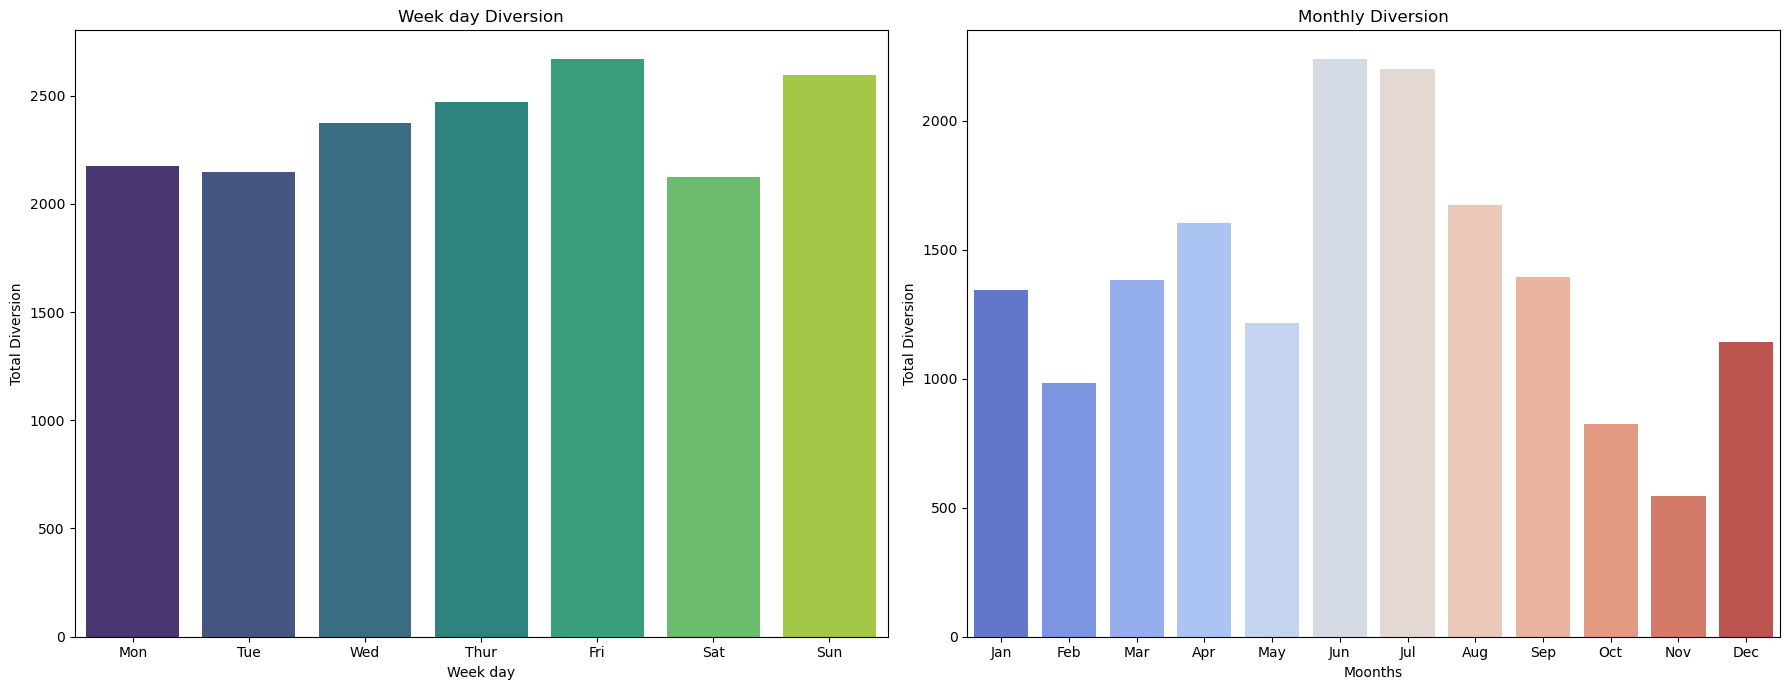

In [25]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(18,7))

# Weekly Diversion of flights

sns.barplot(x=week_day_diverted_flight.index,y=week_day_diverted_flight.values,ax=axes[0],palette='viridis')
axes[0].set_title('Week day Diversion')
axes[0].set_xlabel('Week day')
axes[0].set_ylabel('Total Diversion')
axes[0].set_xticklabels((['Mon', 'Tue', 'Wed','Thur','Fri','Sat','Sun']))

# Monthly Diversion of Flights

sns.barplot(x=monthly_diverted.index,y=monthly_diverted.values,ax=axes[1],palette='coolwarm')
axes[1].set_title('Monthly Diversion')
axes[1].set_xlabel('Moonths')
axes[1].set_ylabel('Total Diversion')
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

plt.tight_layout()
plt.show()

#  Flight cancelled due to weather condition


In [29]:
weather['time']=pd.to_datetime(weather['time'])

In [32]:
# Merge datasets Weather and cancelled 

merged_df=pd.merge(weather,cancelled,left_on=['airport_id','time'],right_on=['Dep_Airport','FlightDate'])

# Flitered by When flights are cancelled

filtered_df=merged_df[merged_df['Cancelled']==1]

# Grouping the data and countig values

result_df=filtered_df.groupby(['tavg','tmax','tmin','prcp','snow','wdir','wspd','pres','airport_id']).size().reset_index(name='Flights_cancelled')

result_df=result_df.sort_values(by='Flights_cancelled',ascending=False)

In [33]:
result_df.to_csv('result_df.csv', index=False)


#  Correlation Between flight Cancelled and weather

In [34]:
weather_cancelled_flight=pd.read_csv('result_df.csv')

In [35]:
weather_cancelled_flight.head()

,tavg,tmax,tmin,prcp,snow,wdir,wspd,pres,airport_id,Flights_cancelled
0,-1.9,-0.5,-2.1,7.1,30.0,350.0,14.4,1028.0,DFW,551
1,-3.0,-1.6,-3.8,8.9,0.0,351.0,22.0,1027.7,DFW,478
2,22.0,28.9,20.6,38.1,0.0,149.0,14.8,1013.2,FLL,264
3,21.5,24.4,19.0,8.5,0.0,7.0,4.7,1006.4,LGA,243
4,24.9,27.2,22.2,19.5,0.0,87.0,5.0,1010.4,LGA,235


In [36]:
# Calculate Correlation Matrix
correlation_matrix=weather_cancelled_flight.corr(numeric_only=True,method='kendall')

# Extract correlation with Flight Cancelled
cancelled_flights_correlation = correlation_matrix['Flights_cancelled'].sort_values(ascending=False)

print(cancelled_flights_correlation)

Flights_cancelled    1.000000
tmin                 0.071508
prcp                 0.058388
tavg                 0.056628
tmax                 0.041390
wspd                 0.034117
snow                 0.019688
wdir                 0.014922
pres                -0.062007
Name: Flights_cancelled, dtype: float64


In [37]:
data={'variable':['tmin','prcp','tavg','tmax','wsps','snow','wdir','pres'],
     'correlation':[0.071508,0.058388,0.056628,0.041390,0.034117,0.019688,0.014922,-0.062007]}

In [38]:
correlation_dash=pd.DataFrame(data)
correlation_dash=correlation_dash.sort_values(by='correlation',ascending=False)


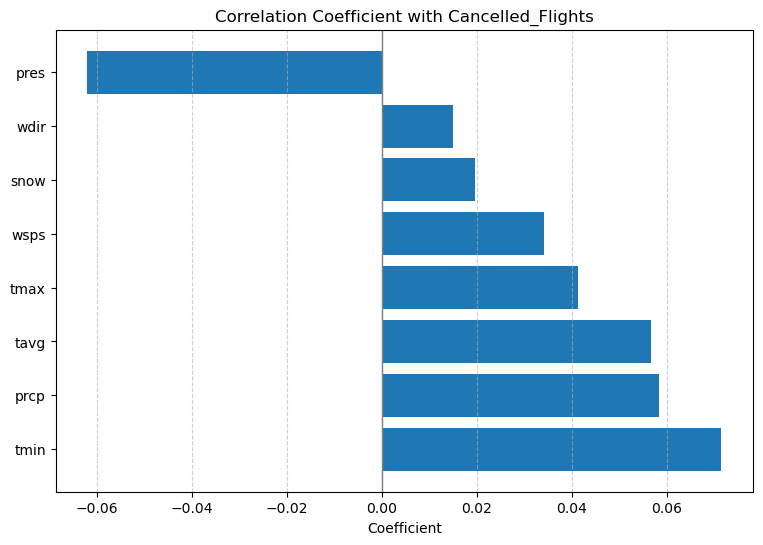

In [39]:
# Plotting the correlation data
plt.figure(figsize=(9,6))
plt.barh(correlation_dash['variable'],correlation_dash['correlation'])
plt.title('Correlation Coefficient with Cancelled_Flights')
plt.xlabel('Coefficient')
plt.axvline(x=0,color='grey',lw=1)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


# Correlation between weather and flight diverted

In [40]:
# Flitered by When flights are cancelled

filterd_diverted=merged_df[merged_df['Diverted']==1]

# Grouping the data and countig values

result_diverted=filterd_diverted.groupby(['tavg','tmax','tmin','prcp','snow','wdir','wspd','pres','airport_id']).size().reset_index(name='Flights_diverted')

result_diverted=result_diverted.sort_values(by='Flights_diverted',ascending=False)

result_diverted.to_csv('result_diverted',index=False)

In [41]:
weather_diverted_flights=pd.DataFrame(result_diverted)

In [42]:
correlation_matrix2=weather_diverted_flights.corr(numeric_only=True,method='pearson')

diverted_correlation=correlation_matrix2['Flights_diverted'].sort_values(ascending=False)

print(diverted_correlation)

Flights_diverted    1.000000
tmin                0.046869
tavg                0.046238
tmax                0.041421
wspd                0.038954
wdir                0.019710
prcp                0.009853
snow               -0.015759
pres               -0.035410
Name: Flights_diverted, dtype: float64


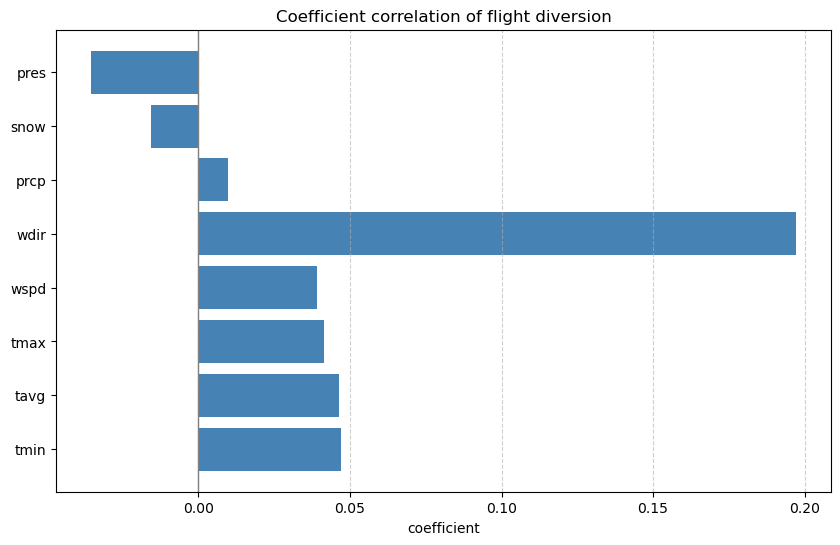

In [43]:
# plotting the correlation
data2={'variables':['tmin','tavg','tmax','wspd','wdir','prcp','snow','pres'],
      'values':[0.046869,0.046238,0.041421,0.0389540,0.19710,0.009853,-0.015759,-0.035410]}

diverted_flight_data=pd.DataFrame(data2)
plt.figure(figsize=(10,6))

plt.barh(diverted_flight_data['variables'],diverted_flight_data['values'],color='steelblue')
plt.title('Coefficient correlation of flight diversion')
plt.xlabel('coefficient')

plt.axvline(x=0,color='grey',lw=1)
plt.grid(axis='x', linestyle='--', alpha=0.6)